# Copyright

<PRE>
Copyright (c) 2022 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

In [ ]:
# Keras imports : model, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras.initializers import GlorotNormal, HeNormal # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras.callbacks import EarlyStopping # early stopping

In [ ]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]
print(X.shape)

(20640, 8)


Splitting data into training, validation and test sets:

In [ ]:
valid_split = 0.2
test_split  = 0.1

v_point = int(nb_samples*(1-valid_split-test_split))
t_point = int(nb_samples*(1-test_split))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [ ]:
scaler  = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [ ]:
print(Y_train[0])

4.526


Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [ ]:
model = Sequential()
model.add(Dense(8, activation='tanh',kernel_initializer=GlorotNormal(),input_shape=(8,)))
model.add(Dense(16, activation='tanh',kernel_initializer=GlorotNormal()))
model.add(Dense(1, activation='relu',kernel_initializer=HeNormal()))



Inspect the model summary:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model:

In [ ]:
model.compile(loss='mse', optimizer='adam')

Defining the earlystopping callback function:

In [ ]:
es = EarlyStopping(patience=3, monitor='val_loss', mode='min')

Train the model, use training and validation data and apply early stopping:

In [ ]:
model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_data=(X_valid, Y_valid),
                            callbacks=[es])

Epoch 1/20
113/113 [==============================] - 0s 3ms/step - loss: 0.3340 - val_loss: 0.6545
Epoch 2/20
113/113 [==============================] - 0s 2ms/step - loss: 0.3310 - val_loss: 0.6549
Epoch 3/20
113/113 [==============================] - 0s 2ms/step - loss: 0.3275 - val_loss: 0.6477
Epoch 4/20
113/113 [==============================] - 0s 2ms/step - loss: 0.3251 - val_loss: 0.6628
Epoch 5/20
113/113 [==============================] - 0s 2ms/step - loss: 0.3229 - val_loss: 0.6704
Epoch 6/20
113/113 [==============================] - 0s 2ms/step - loss: 0.3213 - val_loss: 0.6559


Evaluate on the test data:

In [ ]:
print(model.evaluate(X_test, Y_test))

65/65 [==============================] - 0s 1ms/step - loss: 0.2982
0.29818102717399597


Make predictions:

In [ ]:
preds = model.predict(X_test)

Inspecting the result on a regression plot:

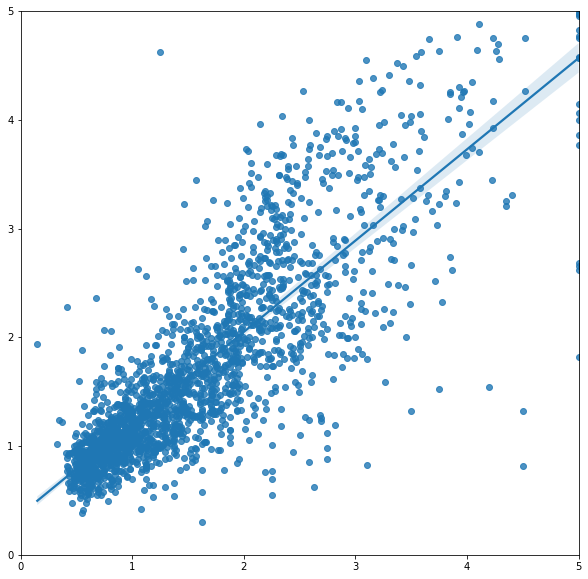

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 